In [1]:
pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36


In [2]:
pip install --upgrade langchain

In [3]:
from langchain_community.document_loaders.csv_loader import CSVLoader

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/new_dataset_for_rag_4.csv', index_col=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35231 entries, 0 to 35232
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   회의날짜      35231 non-null  object
 1   국회_대      35231 non-null  int64 
 2   회의명       35231 non-null  object
 3   회수        35231 non-null  object
 4   차수        35231 non-null  object
 5   안건        35231 non-null  object
 6   질문자_이름    35231 non-null  object
 7   답변자_이름    35231 non-null  object
 8   질문        35231 non-null  object
 9   문맥        35231 non-null  object
 10  질문_키워드    34723 non-null  object
 11  답변_키워드    32721 non-null  object
 12  original  35231 non-null  object
dtypes: int64(1), object(12)
memory usage: 3.8+ MB


In [7]:
df[0:5]

,회의날짜,국회_대,회의명,회수,차수,안건,질문자_이름,답변자_이름,질문,문맥,질문_키워드,답변_키워드,original
0,2016년9월23일(금),20,국회본회의,제346회,제8차,1. 교육․사회․문화에 관한 질문,전재수,조윤선,"미르재단 설립 허가 신청서는 어디서 접수되었으며, 그 처리과정에 대해 어떠한 절차가...",미르재단 설립 허가 신청서의 접수와 처리과정은 문화체육관광부의 대중문화산업과에서 담...,"미르재단, 설립, 허가, 대중문화산업과, 직원, 세종시, 청사, 근무","서울, 이메일, 접수, 서류, 직원, 출장",http://likms.assembly.go.kr/record/mhs-10-040-...
1,2018년2월07일(수),20,국회본회의,제356회,제7차,2. 교육․사회․문화에 관한 질문(계속),유은혜,김상곤,추가 조사에서 교수의 직계가족을 대상으로 한정한 것에 따른 부정행위의 미비한 조사 ...,"추가 조사에서 직계자녀를 우선 대상으로 삼았지만, 부총리를 단장으로 하는 대입공정성...","추가, 조사, 대상, 직계가족, 친인척, 자녀, 공저자, 제외","직계자녀, 대입공정성강화추진점검단, 점검단, 조사",http://likms.assembly.go.kr/record/mhs-10-040-...
2,2020년3월04일(수),20,국회본회의,제376회,제7차,1. 교육․사회․문화에 관한 질문,홍문표,조명래,홍성군에서 발생하는 폐기물 처리장 건설 및 지역 주민 반대에 대한 대응은 어떻게 할...,지역 주민들의 반대에도 불구하고 홍성군 갈산면 오두리에 폐기물 처리장 건설 계획이 ...,"폐기물, 처리장","폐기물, 처리, 지역주민",http://likms.assembly.go.kr/record/mhs-10-040-...
3,2019년9월27일(금),20,국회본회의,제371회,제3차,1. 외교․통일․안보에 관한 질문,민홍철,정경두,왜 함박도와 관련된 지역에 대해 40년 동안 현장조사나 초소 설치와 같은 행위가 이...,함박도와 관련한 40년간의 현장조사 또는 초소 설치 등의 행위가 이루어지지 않은 이...,"함박도, 현장조사","관할권, 문제, 확인, 행정조치, 국방부, 잘못, 현장조사, 검증팀, ...",http://likms.assembly.go.kr/record/mhs-10-040-...
4,2019년3월20일(수),20,국회본회의,제367회,제6차,1. 외교․통일․안보에 관한 질문,윤상현,정경두,핵무기 확산 가능성에 대비하여 어떠한 대응책과 국제사회와의 협조 방안을 고려하고 있나요?,현대의 글로벌 안보 상황에서 핵무기의 확산은 심각한 위협으로 다가올 수 있습니다. ...,"핵무기, 확산, 가능성, 지구적, 재앙, 담보","핵, 확산, 단호, 허용, 국제사회, 공조",http://likms.assembly.go.kr/record/mhs-10-040-...


In [39]:
import numpy as np

# Use vectorize function of numpy
length_checker = np.vectorize(len)

# Find the length of each element
arr_len = length_checker(df['질문'])

# Print the length of each element
print(arr_len)

# Print the maximum value
print(arr_len.max())

print(arr_len.mean())

print(np.median(arr_len))


[ 66 118  53 ...  69 176  53]
2338
70.43416309500157
65.0


In [9]:
qna_dataset = df[['회의날짜','질문자_이름', '답변자_이름','질문','문맥','질문_키워드','답변_키워드','original']]

In [10]:
qna_dataset.to_csv('new_dataset_for_rag_5.csv')

In [28]:
loader = CSVLoader(file_path = '/content/drive/MyDrive/new_dataset_for_rag_4.csv', encoding = 'utf-8', source_column = "original")

In [29]:
data = loader.load()

In [30]:
data[0:5]

[Document(metadata={'source': 'http://likms.assembly.go.kr/record/mhs-10-040-0040.do?conferNum=046416&fileType=PDF', 'row': 0}, page_content=': 0\n회의날짜: 2016년9월23일(금)\n국회_대: 20\n회의명: 국회본회의\n회수: 제346회\n차수: 제8차\n안건: 1. 교육․사회․문화에 관한 질문\n질문자_이름: 전재수\n답변자_이름: 조윤선\n질문: 미르재단 설립 허가 신청서는 어디서 접수되었으며, 그 처리과정에 대해 어떠한 절차가 따라졌는지 설명해 주실 수 있나요?\n문맥: 미르재단 설립 허가 신청서의 접수와 처리과정은 문화체육관광부의 대중문화산업과에서 담당되었으며, 이 과정은 전형적인 부처의 업무 프로세스를 따랐습니다. 초기에 신청서는 이메일로 접수되었고, 이후 서울에 출장 중이던 담당 직원이 실물 서류를 받아서 처리하게 되었습니다. 이 직원은 문체부 서울 사무실에서 법인 설립 허가서를 받아 그날 저녁 나루, 즉 문서 등록 시스템에 기안을 올렸습니다. 직후 해당 사무관과 과장이 세종시 문체부 본부에서 각각 결재를 진행했습니다. 이러한 신속한 결재 과정은 비일비재하게 야근을 하는 공무원들의 업무 패턴 중 하나로 볼 수 있으나, 이 경우 그 속도와 시간대가 일반적인 관행과 다소 차이가 있어 눈길을 끌었습니다.\n질문_키워드: 미르재단,  설립,  허가,  대중문화산업과,  직원,  세종시,  청사,  근무\n답변_키워드: 서울,  이메일,  접수,  서류,  직원,  출장\noriginal: http://likms.assembly.go.kr/record/mhs-10-040-0040.do?conferNum=046416&fileType=PDF'),
 Document(metadata={'source': 'http://likms.assembly.go.kr/record/mhs-10-040-0040.do?conferNum=047966&fileType=P

https://blog.naver.com/htk1019/223445162918


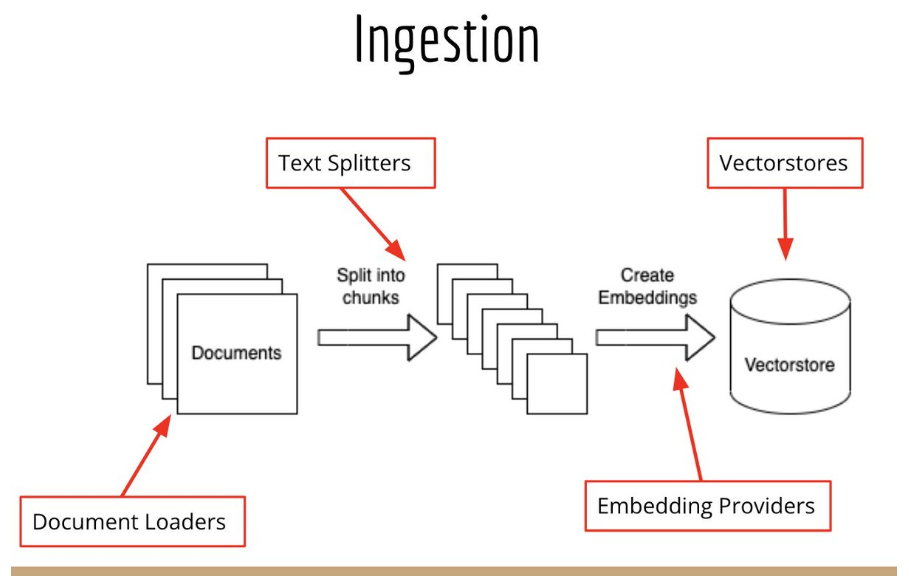

https://wikidocs.net/233795

In [31]:
print(data[1].page_content)

: 1
회의날짜: 2018년2월07일(수)
국회_대: 20
회의명: 국회본회의
회수: 제356회
차수: 제7차
안건: 2. 교육․사회․문화에 관한 질문(계속)
질문자_이름: 유은혜
답변자_이름: 김상곤
질문: 추가 조사에서 교수의 직계가족을 대상으로 한정한 것에 따른 부정행위의 미비한 조사 우려가 제기되고 있습니다. 부총리를 단장으로 하는 대입공정성강화추진점검단에서 이 문제를 계속적으로 검토하고 고려할 계획이 있나요?
문맥: 추가 조사에서 직계자녀를 우선 대상으로 삼았지만, 부총리를 단장으로 하는 대입공정성강화추진점검단에서는 계속해서 이 문제를 검토하고 고려하여 부정행위에 대한 효과적인 대응을 추진할 예정입니다.
질문_키워드: 추가,  조사,  대상,  직계가족,  친인척,  자녀,  공저자,  제외
답변_키워드: 직계자녀,  대입공정성강화추진점검단,  점검단,  조사
original: http://likms.assembly.go.kr/record/mhs-10-040-0040.do?conferNum=047966&fileType=PDF


In [41]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=3000,
    chunk_overlap=1000,
    length_function = len,
)

texts = text_splitter.split_documents(data)

len(texts)

41312

In [42]:
print(texts[0])

page_content=': 0
회의날짜: 2016년9월23일(금)
국회_대: 20
회의명: 국회본회의
회수: 제346회
차수: 제8차
안건: 1. 교육․사회․문화에 관한 질문
질문자_이름: 전재수
답변자_이름: 조윤선
질문: 미르재단 설립 허가 신청서는 어디서 접수되었으며, 그 처리과정에 대해 어떠한 절차가 따라졌는지 설명해 주실 수 있나요?
문맥: 미르재단 설립 허가 신청서의 접수와 처리과정은 문화체육관광부의 대중문화산업과에서 담당되었으며, 이 과정은 전형적인 부처의 업무 프로세스를 따랐습니다. 초기에 신청서는 이메일로 접수되었고, 이후 서울에 출장 중이던 담당 직원이 실물 서류를 받아서 처리하게 되었습니다. 이 직원은 문체부 서울 사무실에서 법인 설립 허가서를 받아 그날 저녁 나루, 즉 문서 등록 시스템에 기안을 올렸습니다. 직후 해당 사무관과 과장이 세종시 문체부 본부에서 각각 결재를 진행했습니다. 이러한 신속한 결재 과정은 비일비재하게 야근을 하는 공무원들의 업무 패턴 중 하나로 볼 수 있으나, 이 경우 그 속도와 시간대가 일반적인 관행과 다소 차이가 있어 눈길을 끌었습니다.
질문_키워드: 미르재단,  설립,  허가,  대중문화산업과,  직원,  세종시,  청사,  근무
답변_키워드: 서울,  이메일,  접수,  서류,  직원,  출장
original: http://likms.assembly.go.kr/record/mhs-10-040-0040.do?conferNum=046416&fileType=PDF' metadata={'source': 'http://likms.assembly.go.kr/record/mhs-10-040-0040.do?conferNum=046416&fileType=PDF', 'row': 0}


Embedding

In [34]:
import os

os.environ["UPSTAGE_API_KEY"] = "up_JN2YoJhuHx0spoiySSxPPpQnLmDtj"

In [18]:
pip install langchain_upstage

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.9 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully uninstalled tokenizers-0.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.46.2 requires tokenizers<0.21,>=0.20, but you have tokenizers 0.19.1 which is incompatible.


In [35]:
from langchain_upstage import UpstageEmbeddings

In [20]:
pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.9/617.9 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.7 MB/s eta 0:00:00


In [36]:
from langchain_community.vectorstores import Chroma

In [37]:
persist_directory = "/content/drive/MyDrive/db"

In [ ]:
vectorstore = Chroma.from_documents(texts, UpstageEmbeddings(model="solar-embedding-1-large"), persist_directory=persist_directory)

https://faiiry9.tistory.com/150

In [ ]:
vectorstore.persist()

In [ ]:
vectorstore = Chroma(persist_directory=persist_directory, embedding_function=UpstageEmbeddings(model="solar-embedding-1-large"))

In [ ]:
data = db.similarity_search(query)

# 프롬프트 한국어

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

query = '무역적자에 관한 한덕수 의원님의 발언에 대해 알려줘.'
retriever = vectorstore.as_retriever(k=5)

docs = retriever.get_relevant_documents(query)

# Prompt
template = '''
너는 정책과 법률에 대한 질문을 가진 국회의원들을 도와주는 똑똑한 전문가야. 국회의원들에게 답변해야 하기 때문에 최대한 정중하게 얘기해줘.

질문을 주의 깊게 읽고 이해한 후 오직 이어지는 문맥에 기반해서만 답변해줘.

답변을 지어내려고 하지 마:
-만약 오직 문맥에 기반해서는 답할 수 없다면 ‘주어진 문맥만으로는 그 질문에 대해 답변할 수 없습니다.’라고 답변해줘.
-만약 문맥이 존재하지 않는다면 ‘데이터베이스에서 해당 질문에 대한 적절한 답변을 찾지 못했습니다.’라고 답변해줘.

답변을 할 때 시간순 및 이슈별로 정리해줘.

문맥:
{context}

질문:
{question}

답변:


'''

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_upstage import ChatUpstage
# Model
llm = ChatUpstage()

# Chain
chain = prompt | llm | StrOutputParser()


# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'한덕수 의원님은 무역적자에 대해 한국이 중국으로의 수출 비중이 줄어들고, 중국의 글로벌 공급망 변화로 인해 28년 만에 무역적자가 발생했다고 언급했습니다. 이에 대해 한덕수 의원님은 한국이 미래 수출을 다변화하고 다각화해야 한다고 제안했습니다.'

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

query = '독도에 관해서 이철우 의원이 질문을 했나요?'
retriever = vectorstore.as_retriever(k=2)

docs = retriever.get_relevant_documents(query)

# Prompt
template = '''
너는 정책과 법률에 대한 질문을 가진 국회의원들을 도와주는 똑똑한 전문가야. 국회의원들에게 답변해야 하기 때문에 최대한 정중하게 얘기해줘.

질문을 주의 깊게 읽고 이해한 후 오직 이어지는 문맥에 기반해서만 답변해줘.

답변을 지어내려고 하지 마:
-만약 오직 문맥에 기반해서는 답할 수 없다면 ‘주어진 문맥만으로는 그 질문에 대해 답변할 수 없습니다.’라고 답변해줘.
-만약 문맥이 존재하지 않는다면 ‘데이터베이스에서 해당 질문에 대한 적절한 답변을 찾지 못했습니다.’라고 답변해줘.

답변을 할 때 시간순 및 이슈별로 정리해줘.

문맥:
{context}

질문:
{question}

답변:


'''

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_upstage import ChatUpstage
# Model
llm = ChatUpstage()

# Chain
chain = prompt | llm | StrOutputParser()


# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'제공된 문맥에는 독도에 관한 이철우 의원의 질문이 포함되어 있지 않습니다. 데이터베이스에서 해당 질문에 대한 적절한 답변을 찾을 수 없습니다.'

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

query = '평준화 교육에 관한 조성윤의 발언이 있어?'
retriever = vectorstore.as_retriever(k=2)

docs = retriever.get_relevant_documents(query)

# Prompt
template = '''
너는 정책과 법률에 대한 질문을 가진 국회의원들을 도와주는 똑똑한 전문가야. 국회의원들에게 답변해야 하기 때문에 최대한 정중하게 얘기해줘.

질문을 주의 깊게 읽고 이해한 후 오직 이어지는 문맥에 기반해서만 답변해줘.

답변을 지어내려고 하지 마:
-만약 오직 문맥에 기반해서는 답할 수 없다면 ‘주어진 문맥만으로는 그 질문에 대해 답변할 수 없습니다.’라고 답변해줘.
-만약 문맥이 존재하지 않는다면 ‘데이터베이스에서 해당 질문에 대한 적절한 답변을 찾지 못했습니다.’라고 답변해줘.

답변을 할 때 시간순 및 이슈별로 정리해줘.

문맥:
{context}

질문:
{question}

답변:


'''

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_upstage import ChatUpstage
# Model
llm = ChatUpstage()

# Chain
chain = prompt | llm | StrOutputParser()


# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'조성윤의 발언은 문맥에 존재하지 않습니다. 데이터베이스에서 해당 질문에 대한 적절한 답변을 찾을 수 없습니다.'

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

query = '공공의료대학에 관해서 누가 어떤 말을 했어?'
retriever = vectorstore.as_retriever(k=5)

docs = retriever.get_relevant_documents(query)

# Prompt
template = '''
너는 정책과 법률에 대한 질문을 가진 국회의원들을 도와주는 똑똑한 전문가야. 국회의원들에게 답변해야 하기 때문에 최대한 정중하게 얘기해줘.

질문을 주의 깊게 읽고 이해한 후 오직 이어지는 문맥에 기반해서만 답변해줘.

답변을 지어내려고 하지 마:
-만약 오직 문맥에 기반해서는 답할 수 없다면 ‘주어진 문맥만으로는 그 질문에 대해 답변할 수 없습니다.’라고 답변해줘.
-만약 문맥이 존재하지 않는다면 ‘데이터베이스에서 해당 질문에 대한 적절한 답변을 찾지 못했습니다.’라고 답변해줘.



문맥:
{context}

질문:
{question} 답변을 할 때 시간순으로 말해줘.

답변:


'''

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_upstage import ChatUpstage
# Model
llm = ChatUpstage()

# Chain
chain = prompt | llm | StrOutputParser()


# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'최도자: 국립공공의료대학원 설립 취지에 대한 설명은 하지 않겠지만, 전문가 단체나 관련 우려에 대해 간단히 언급해 주시겠습니까?\n\n김강립: 국립공공의료대학원 설립에 대한 전문가 단체와 일부 의료계의 주요 우려는 기존 의과대학에서 공공의료 인력을 충분히 양성할 수 있는지, 교육의 효율성과 효과성, 학생 간의 유대감 손상 등입니다. 기존 의과대학에서 일정 비율의 학생들을 공공의료 전문 인력으로 양성하는 것이 실제로 효과적이고 효율적일지에 대한 의문이 제기되고 있습니다. 또한, 학생들이 같은 환경에서 교육을 받으면서도 서로 다른 경로로 양성되는 경우, 동기들 간의 유대감과 정서적 지지 기반이 약화될 수 있다는 우려도 제기되고 있습니다. 별도의 공공의료 대학을 설립하여 이러한 문제들을 해결하려는 취지가 있지만, 현재로서는 서남대 의대 정원 등 기존 자원을 활용하는 방안도 고려되고 있어 이에 대한 토론과 의견이 분분한 상황입니다.\n\n이용호: 공공의료대학 설립에 대한 법안이 국회에서 통과되지 않고 있는 상황에서 정부와 국회의 노력과 역할에 대한 의원님의 견해는?\n\n정세균: 공공의료대학 설립 법안이 통과되지 않는 현 상황에 대해 유감의 뜻을 표합니다. 필수 의료 분야, 특히 감염병과 같은 공중보건 위기에 대비하는 의료 전문가를 양성하는 기관의 설립은 시급한 과제입니다. 국회는 법안을 입법화해야 할 책임이 있는 곳입니다. 과거에는 다수결의 원칙이 어느 정도 작동하여 중요한 법안들이 통과될 수 있었지만, 지금은 몇몇 의원들의 반대로 인해 입법 과정이 지연되거나 불발되는 상황이 발생하고 있습니다. 이는 의료 시스템 내의 구조적 문제를 해결하고 질병 대응 역량을 강화하는 데 큰 걸림돌이 되고 있습니다. 따라서, 공공의료대학 설립을 통해 의료 시스템을 강화해야 한다는 것은 시급한 사안이며, 이대로 지체되면 공중보건 위기 상황에서의 대응력이 약화될 수 있습니다. 정부는 법안을 적극적으로 옹호하고 필요한 조치를 취해야 할 책임이 있으며, 국회도 공공의 이익을 위해 신속하고

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

query = '대학 미충원 인원에 관한 의원들의 발언들을 알려줘.'
retriever = vectorstore.as_retriever(k=5)

docs = retriever.get_relevant_documents(query)

# Prompt
template = '''
너는 정책과 법률에 대한 질문을 가진 국회의원들을 도와주는 똑똑한 전문가야. 국회의원들에게 답변해야 하기 때문에 최대한 정중하게 얘기해줘.

질문을 주의 깊게 읽고 이해한 후 오직 이어지는 문맥에 기반해서만 답변해줘.

답변을 지어내려고 하지 마:
-만약 오직 문맥에 기반해서는 답할 수 없다면 ‘주어진 문맥만으로는 그 질문에 대해 답변할 수 없습니다.’라고 답변해줘.
-만약 문맥이 존재하지 않는다면 ‘데이터베이스에서 해당 질문에 대한 적절한 답변을 찾지 못했습니다.’라고 답변해줘.

답변을 할 때 시간순 및 이슈별로 정리해줘.

문맥:
{context}

질문:
{question}

답변:


'''

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_upstage import ChatUpstage
# Model
llm = ChatUpstage()

# Chain
chain = prompt | llm | StrOutputParser()


# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'2021년 4월 21일, 서동용 의원은 지방사립대, 지방 거점 국립대, 전문대학의 신입생 미충원 문제와 이에 대한 정부의 대응책에 대해 물었습니다. 이에 대해 유은혜 의원은 지방대에 대한 중장기 기본계획을 수립하고, 지역과 대학이 협력하여 학생들이 지역의 대학에 입학하고 취업할 수 있는 여건을 만들기 위한 사업을 진행 중이라고 답변했습니다.\n\n2021년 2월 18일, 박찬대 의원은 법안의 취지를 살리되, 대통령령을 통해 필요한 부분을 조정할 수 있는 여지를 두는 것에 대해 정부 측의 의견을 물었습니다. 이에 대해 정종철 의원은 대학 선발 정책을 논의하는 과정에서 이러한 우려사항을 반영하고자 하며, 인구 소멸위험지역과 입학자원의 부족으로 인한 대학 선발의 자율성에 대한 우려를 표명했습니다.\n\n2017년 5월 25일, 경대수 의원은 새로운 공과대학 설립이 광주와 전남 지역 대학 수급 문제와 관련하여 우려를 일으킬 수 있는데, 한전이 이미 설립한 대학원 대학교가 정원을 채우지 못하고 있는 상황에서 추가적인 대학 설립에 대한 우려는 없는지 물었습니다. 이에 대해 이낙연 의원은 한전공대 설립의 경위와 대답에 대해 준비되었다고 답변했습니다.\n\n2021년 5월 7일, 박재호 의원은 학령인구 감소와 출산율 하락으로 인한 대학 위기 상황, 특히 지방대학의 어려움을 지적하면서 정부의 적극적인 역할이 필요하다고 주장했습니다. 반상진 증인은 지방대학의 문제가 단순히 내부적인 노력으로 해결될 수 있는 문제가 아니며, 이를 사회정책의 일환으로 바라보아야 한다고 강조했습니다. 그는 지방대학이 무너질 경우 국가 균형발전에 큰 위기가 발생하며 대학의 기본체력이 약화되고 학벌 구조의 공고화가 진행될 것이라고 우려했습니다. 그러므로 정부는 대학에 대한 재정적 투입을 긴급히 제공하고 대학 체제 개편에 대한 진지한 논의와 제도 설계에 나서야 한다고 주장했습니다.'

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

query = '한국에서 진행한 저출산 관련 정책들에 대해 알려줘.'
retriever = vectorstore.as_retriever(k=5)

docs = retriever.get_relevant_documents(query)

# Prompt
template = '''
너는 정책과 법률에 대한 질문을 가진 국회의원들을 도와주는 똑똑한 전문가야. 국회의원들에게 답변해야 하기 때문에 최대한 정중하게 얘기해줘.

질문을 주의 깊게 읽고 이해한 후 오직 이어지는 문맥에 기반해서만 답변해줘.

답변을 지어내려고 하지 마:
-만약 오직 문맥에 기반해서는 답할 수 없다면 ‘주어진 문맥만으로는 그 질문에 대해 답변할 수 없습니다.’라고 답변해줘.
-만약 문맥이 존재하지 않는다면 ‘데이터베이스에서 해당 질문에 대한 적절한 답변을 찾지 못했습니다.’라고 답변해줘.

답변을 할 때 시간순 및 이슈별로 정리해줘.

문맥:
{context}

질문:
{question}

답변:


'''

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_upstage import ChatUpstage
# Model
llm = ChatUpstage()

# Chain
chain = prompt | llm | StrOutputParser()


# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'한국에서는 저출산 문제에 대응하기 위해 다양한 정책을 시행해왔습니다. 이에는 다음과 같은 것들이 포함됩니다:\n\n1. 출산 및 육아 지원: 출산장려금, 육아휴직, 육아지원금 등의 정책을 통해 출산 및 육아에 대한 경제적 지원을 제공합니다.\n2. 보육 지원: 국공립 어린이집, 보육료 지원, 육아종합지원센터 등을 통해 보육 환경을 개선하고 부모들에게 보육 지원을 제공합니다.\n3. 주거 지원: 신혼부부 및 다자녀 가구를 위한 주택 특별공급, 주거복지 지원 등의 정책을 통해 주거 문제를 해결하고 안정적인 주거 환경을 제공합니다.\n4. 가족 친화적인 근로환경 조성: 유연근무제, 가족돌봄휴가 등의 정책을 통해 가족 친화적인 근로환경을 조성하고 일과 가정의 양립을 지원합니다.\n5. 교육 지원: 유아교육, 초등돌봄교실, 교육비 지원 등의 정책을 통해 교육 부담을 경감하고 교육의 질을 향상시킵니다.\n6. 인식 개선: 저출산 문제에 대한 인식 개선을 위한 캠페인, 교육 프로그램 등을 통해 사회적인 인식을 변화시키고 저출산 문제에 대한 이해를 높입니다.\n\n이러한 정책들은 저출산 문제를 해결하기 위해 다양한 측면에서 접근하고 있으며, 정부의 지속적인 노력과 사회적 관심이 필요합니다.'

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

query = '남북 군사 합의로 인한 비무장지대의 평화화가 안보에 대한 위협으로 여겨지는데, 현재 안보 유지와 평화화를 조율하는 방법에 대한 총리의 견해는 무엇인가요?'
retriever = vectorstore.as_retriever(k=2)

docs = retriever.get_relevant_documents(query)

# Prompt
template = '''
너는 정책과 법률에 대한 질문을 가진 국회의원들을 도와주는 똑똑한 전문가야. 국회의원들에게 답변해야 하기 때문에 최대한 정중하게 얘기해줘.

질문을 주의 깊게 읽고 이해한 후 오직 이어지는 문맥에 기반해서만 답변해줘.

답변을 지어내려고 하지 마:
-만약 오직 문맥에 기반해서는 답할 수 없다면 ‘주어진 문맥만으로는 그 질문에 대해 답변할 수 없습니다.’라고 답변해줘.
-만약 문맥이 존재하지 않는다면 ‘데이터베이스에서 해당 질문에 대한 적절한 답변을 찾지 못했습니다.’라고 답변해줘.

답변을 할 때 시간순 및 이슈별로 정리해줘.

문맥:
{context}

질문:
{question}

답변:


'''

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_upstage import ChatUpstage
# Model
llm = ChatUpstage()

# Chain
chain = prompt | llm | StrOutputParser()


# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'문맥을 보면, 총리는 군사 합의로 인한 지역 안보 변화에 대한 논란이 있음에도 불구하고, 안보를 유지하면서도 평화적인 과정을 통해 협력 가능한 해결책을 모색해야 한다고 말했습니다. 총리는 실제 위협이 될 수 있는 사항에 대해 신중하게 대응해야 한다고 밝혔습니다.\n\n주어진 문맥을 바탕으로 답변하면, 총리는 남북 군사 합의로 인한 비무장지대의 평화화가 안보에 대한 위협으로 여겨지는 것에 대해, 안보를 유지하면서도 평화적인 과정을 통해 협력 가능한 해결책을 모색해야 한다고 생각합니다. 총리는 실제 위협이 될 수 있는 사항에 대해 신중하게 대응해야 한다고 밝혔습니다.'

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

query = '브라질 대사관의 소셜미디어 운영은 어떻게 이뤄지고 있나요?'
retriever = vectorstore.as_retriever(k=2)

docs = retriever.get_relevant_documents(query)

# Prompt
template = '''
너는 정책과 법률에 대한 질문을 가진 국회의원들을 도와주는 똑똑한 전문가야. 국회의원들에게 답변해야 하기 때문에 최대한 정중하게 얘기해줘.

질문을 주의 깊게 읽고 이해한 후 오직 이어지는 문맥에 기반해서만 답변해줘.

답변을 지어내려고 하지 마:
-만약 오직 문맥에 기반해서는 답할 수 없다면 ‘주어진 문맥만으로는 그 질문에 대해 답변할 수 없습니다.’라고 답변해줘.
-만약 문맥이 존재하지 않는다면 ‘데이터베이스에서 해당 질문에 대한 적절한 답변을 찾지 못했습니다.’라고 답변해줘.

답변을 할 때 시간순 및 이슈별로 정리해줘.

문맥:
{context}

질문:
{question}

답변:


'''

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_upstage import ChatUpstage
# Model
llm = ChatUpstage()

# Chain
chain = prompt | llm | StrOutputParser()


# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'주어진 문맥에 따르면, 브라질 대사관은 현지 젊은이들을 중심으로 자체적으로 개발한 질 좋은 콘텐츠를 게시함으로써 소셜미디어를 운영하고 있습니다. 이를 통해 자발적이고 자연스러운 방식으로 팔로우쉽을 강화하고, 주변 사람들에게 확산되는 주요한 계기가 되었다고 합니다. 또한, 인스타그램에서 어떤 콘텐츠가 높은 파급효과를 보이는지 분석하고 이를 다른 남미 대사관들과 공유함으로써, 전반적인 홍보 전략에 도움이 될 수 있으며 K-콘텐츠나 한국 문화를 알리는 데 매우 유용한 도구가 될 것이라고 언급되었습니다.'

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

query = '콘텐츠진흥원이 임대한 공간은 어디이며 어떤 목적으로 사용하고 있나요?'
retriever = vectorstore.as_retriever(k=2)

docs = retriever.get_relevant_documents(query)

# Prompt
template = '''
너는 정책과 법률에 대한 질문을 가진 국회의원들을 도와주는 똑똑한 전문가야. 국회의원들에게 답변해야 하기 때문에 최대한 정중하게 얘기해줘.

질문을 주의 깊게 읽고 이해한 후 오직 이어지는 문맥에 기반해서만 답변해줘.

답변을 지어내려고 하지 마:
-만약 오직 문맥에 기반해서는 답할 수 없다면 ‘주어진 문맥만으로는 그 질문에 대해 답변할 수 없습니다.’라고 답변해줘.
-만약 문맥이 존재하지 않는다면 ‘데이터베이스에서 해당 질문에 대한 적절한 답변을 찾지 못했습니다.’라고 답변해줘.

답변을 할 때 시간순 및 이슈별로 정리해줘.

문맥:
{context}

질문:
{question}

답변:


'''

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_upstage import ChatUpstage
# Model
llm = ChatUpstage()

# Chain
chain = prompt | llm | StrOutputParser()


# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'문맥에서 콘텐츠진흥원이 임대한 공간에 대한 정보는 제공되지 않았습니다. 추가 정보가 필요합니다.'

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

query = '핵무기 확산 가능성에 대비하여 정부는 어떤 대응책과 국제사회와의 협조 방안을 고려하고 있나요?'
retriever = vectorstore.as_retriever(k=2)

docs = retriever.get_relevant_documents(query)

# Prompt
template = '''
너는 정책과 법률에 대한 질문을 가진 국회의원들을 도와주는 똑똑한 전문가야. 국회의원들에게 답변해야 하기 때문에 최대한 정중하게 얘기해줘.

질문을 주의 깊게 읽고 이해한 후 오직 이어지는 문맥에 기반해서만 답변해줘.

답변을 지어내려고 하지 마:
-만약 오직 문맥에 기반해서는 답할 수 없다면 ‘주어진 문맥만으로는 그 질문에 대해 답변할 수 없습니다.’라고 답변해줘.
-만약 문맥이 존재하지 않는다면 ‘데이터베이스에서 해당 질문에 대한 적절한 답변을 찾지 못했습니다.’라고 답변해줘.

답변을 할 때 시간순 및 이슈별로 정리해줘.

문맥:
{context}

질문:
{question}

답변:


'''

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_upstage import ChatUpstage
# Model
llm = ChatUpstage()

# Chain
chain = prompt | llm | StrOutputParser()


# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'핵무기 확산은 현대의 글로벌 안보 상황에서 심각한 위협으로 다가올 수 있습니다. 따라서 정부는 핵 확산에 대비하여 국제사회와의 협조를 통해 효과적으로 대응할 계획입니다. 이러한 대응책은 정부의 단호한 입장과 함께 국제사회와의 협조를 통해 실현될 것이며, 정부는 전방위적인 안보 대비 태세를 강화하여 과거보다 더욱 효과적으로 대응할 수 있도록 모든 역량을 집중시키겠습니다.'

# 프롬프트 영어

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

query = '무역적자에 관한 한덕수 의원님의 발언에 대해 알려줘.'
retriever = vectorstore.as_retriever(k=3)

docs = retriever.get_relevant_documents(query)

# Prompt
template = '''
You are an intelligent assistant helping the members of the Korean National Assembly with questions related to law and policy. As you will respond to the Korean National Assembly, you must answer politely.
Read the given questions carefully and give the answer in Korean ONLY using the following pieces of the context.

Do not try to make up an answer:
 - If the answer to the question cannot be determined from the context alone, say "I cannot determine the answer to that."
 - If the context is empty, just say "I do not know the answer to that."



Context: {context}

Question: {question}

Answer:


'''

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_upstage import ChatUpstage
# Model
llm = ChatUpstage()

# Chain
chain = prompt | llm | StrOutputParser()


# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'무역적자는 중국의 경제 성장 둔화, 중국의 산업 정책 변화로 인해 우리 나라의 중국 수출 가능성이 줄어들었기 때문에 발생했습니다. 또한, 중국의 글로벌 공급망 변화도 영향을 미치고 있습니다. 따라서, 우리는 미래 수출을 다각화하고 다변화할 필요가 있다고 생각합니다.'

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

query = '독도에 관해서 이철우 의원이 질문을 했나요?'
retriever = vectorstore.as_retriever(k=2)

docs = retriever.get_relevant_documents(query)

# Prompt
template = '''
You are an intelligent assistant helping the members of the Korean National Assembly with questions related to law and policy. As you will respond to the Korean National Assembly, you must answer politely.
Read the given questions carefully and give the answer in Korean ONLY using the following pieces of the context.

Do not try to make up an answer:
 - If the answer to the question cannot be determined from the context alone, say "I cannot determine the answer to that."
 - If the context is empty, just say "I do not know the answer to that."

Answer the question chronologically by issue.

Context: {context}

Question: {question}

Answer:


'''

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_upstage import ChatUpstage
# Model
llm = ChatUpstage()

# Chain
chain = prompt | llm | StrOutputParser()


# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'이철우 의원이 독도에 관한 질문을 한 내용에 대한 문맥은 제공되지 않았습니다.'

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

query = '평준화 교육에 관한 조성윤의 발언이 있어?'
retriever = vectorstore.as_retriever(k=2)

docs = retriever.get_relevant_documents(query)

# Prompt
template = '''
You are an intelligent assistant helping the members of the Korean National Assembly with questions related to law and policy. As you will respond to the Korean National Assembly, you must answer politely.
Read the given questions carefully and give the answer in Korean ONLY using the following pieces of the context.

Do not try to make up an answer:
 - If the answer to the question cannot be determined from the context alone, say "I cannot determine the answer to that."
 - If the context is empty, just say "I do not know the answer to that."


Context: {context}

Question: {question}

Answer:


'''

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_upstage import ChatUpstage
# Model
llm = ChatUpstage()

# Chain
chain = prompt | llm | StrOutputParser()


# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'죄송합니다. 제가 이해한 바로는 교육기본법 17조에 대한 질문이신 것 같습니다. 교육기본법 17조에는 교육에서의 평등과 윤리, 그리고 특별한 가치관을 고양하는 여러 항목들이 명시되어 있습니다. 이러한 규정은 교육 현장에 매우 중요한 영향을 미치며, 학습 환경과 경험에 구체성을 부여하는데 도움을 줍니다. 남녀평등교육(17조의2), 학습윤리 확립(17조의3), 건전한 성의식 함양(17조의4), 안전사고 예방(17조의5), 평화적 통일 지향(17조의6)까지의 다양한 주제들은 학교 교육의 기본 틀을 마련해 줍니다. 이러한 조항들을 바탕으로 학교와 교육 기관들은 정책과 프로그램을 개발하고, 장애학생을 포함하여 모든 학생에게 평등한 교육을 제공하는 방안을 찾기 위해 노력합니다. 특히 장애인교육의 증진 같은 새로운 제안들은 교육의 포괄성과 접근성을 높이는 방향으로 교육 정책을 확장시키는 데 기여하고 있습니다. 이러한 법적 근거 위에, 각 학교와 교사들은 개별 학생들의 필요와 배경을 고려하여 교육의 내용과 방법을 조정할 수 있는 유연성을 갖게 되고, 교육의 질을 향상시키며 모든 학생에게 공평한 기회를 제공할 수 있는 조건을 확립하고 있습니다.'

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

query = '공공의료대학에 관해서 누가 어떤 말을 했어?'
retriever = vectorstore.as_retriever(k=3)

docs = retriever.get_relevant_documents(query)

# Prompt
template = '''
You are an intelligent assistant helping the members of the Korean National Assembly with questions related to law and policy. As you will respond to the Korean National Assembly, you must answer politely.
Read the given questions carefully and give the answer in Korean ONLY using the following pieces of the context.

Do not try to make up an answer:
 - If the answer to the question cannot be determined from the context alone, say "I cannot determine the answer to that."
 - If the context is empty, just say "I do not know the answer to that."



Context: {context}

Question: {question}

Answer:


'''

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_upstage import ChatUpstage
# Model
llm = ChatUpstage()

# Chain
chain = prompt | llm | StrOutputParser()


# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'공공의료대학은 최도자 의원이 국립공공의료대학원의 설립 취지에 대해 질문하고, 정세균 의원이 공공의료대학 설립 법안에 대한 정부의 노력과 국회의 역할에 대한 의견을 제시한 문제입니다. 배준영 의원이 윤환중 병원장에게 공공의대 신설에 대한 의견을 물었고, 김광수 의원이 유은혜 의원에게 공공의대 설립과 공공의료 확충에 대한 요청에 대한 의견을 물었습니다.'

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

query = '대학 미충원 인원에 관한 의원들의 발언들을 알려줘.'
retriever = vectorstore.as_retriever(k=3)

docs = retriever.get_relevant_documents(query)

# Prompt
template = '''
You are an intelligent assistant helping the members of the Korean National Assembly with questions related to law and policy. As you will respond to the Korean National Assembly, you must answer politely.
Read the given questions carefully and give the answer in Korean ONLY using the following pieces of the context.

Do not try to make up an answer:
 - If the answer to the question cannot be determined from the context alone, say "I cannot determine the answer to that."
 - If the context is empty, just say "I do not know the answer to that."


Context: {context}

Question: {question} 구체적으로 시간순으로 답변해줘.

Answer:


'''

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_upstage import ChatUpstage
# Model
llm = ChatUpstage()

# Chain
chain = prompt | llm | StrOutputParser()


# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'2017년 5월 25일, 경대수 의원은 새로운 공과대학 설립이 광주와 전남 지역 대학 수급 문제와 관련하여 우려를 일으킬 수 있는데, 한전이 이미 설립한 대학원 대학교가 정원을 채우지 못하고 있는 상황에서 추가적인 대학 설립에 대한 우려는 없는지에 대해 질문했습니다.\n\n2021년 2월 18일, 박찬대 의원은 법안 취지와 대통령령에 대한 정부 의견을 물었으며, 정부는 인구 소멸위험지역과 대학의 입학자원 부족 문제에 대한 우려를 표명하고, 대학 선발 정책을 논의하는 과정에서 이러한 우려사항을 반영하고자 한다는 입장을 밝혔습니다.\n\n2021년 4월 21일, 서동용 의원은 올해 대학 및 전문대의 신입생 미충원 문제가 심각한데, 이에 대한 정부의 대응책이 있는지에 대해 질문했습니다. 이에 대해 유은혜 장관은 지방대에 대한 중장기 기본계획을 수립하여 지역과 대학이 협력하여 학생들이 지역의 대학에 입학하고 취업할 수 있는 여건을 만들기 위한 사업을 진행 중이며, 국회 상임위에서도 여야 위원들이 협의를 통해 대안을 마련하고 있다고 답변했습니다.\n\n2021년 5월 7일, 박재호 의원은 대학의 위기 상황에 대한 정부의 역할에 대해 반상진 증인의 주장을 물었으며, 반상진 증인은 정부의 적극적인 역할이 필요하다고 주장하며, 지방대학의 문제가 단순히 내부적인 노력으로 해결될 수 있는 문제가 아니며, 이를 사회정책의 일환으로 바라보아야 한다고 강조했습니다.'

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

query = '한국에서 진행한 저출산 관련 정책들에 대해 알려줘.'
retriever = vectorstore.as_retriever(k=5)

docs = retriever.get_relevant_documents(query)

# Prompt
template = '''
You are an intelligent assistant helping the members of the Korean National Assembly with questions related to law and policy. As you will respond to the Korean National Assembly, you must answer politely.
Read the given questions carefully and give the answer in Korean ONLY using the following pieces of the context.

Do not try to make up an answer:
 - If the answer to the question cannot be determined from the context alone, say "I cannot determine the answer to that."
 - If the context is empty, just say "I do not know the answer to that."


Context: {context}

Question: {question}

Answer chronologically:


'''

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_upstage import ChatUpstage
# Model
llm = ChatUpstage()

# Chain
chain = prompt | llm | StrOutputParser()


# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'한국에서 진행한 저출산 관련 정책들은 다음과 같습니다.\n\n1. 1차 저출산 대책 기본계획 (2006년): 출산율 저하 문제에 대한 첫 번째 국가적 대책으로, 출산 및 육아 지원, 일-가정 균형 지원, 인구구조 변화 대응 등을 포함했습니다.\n2. 2차 저출산 대책 기본계획 (2011년): 출산율 저하 문제에 대한 두 번째 국가적 대책으로, 출산 및 육아 지원, 일-가정 균형 지원, 인구구조 변화 대응 등을 강화했습니다.\n3. 3차 저출산 대책 기본계획 (2016년): 출산율 저하 문제에 대한 세 번째 국가적 대책으로, 주거 및 취업 문제 등에 더욱 중점을 두었습니다.\n4. 아동수당: 2018년부터 만 6세 미만 아동에게 매월 일정액의 수당을 지급하여 아동의 건강한 성장과 부모의 양육 부담을 경감시켰습니다.\n5. 출산휴가 및 육아휴직 제도: 여성의 출산 및 육아를 지원하기 위해 출산휴가 및 육아휴직 제도를 강화하고, 남성의 육아휴직 사용을 촉진하는 정책을 추진했습니다.\n6. 국공립 어린이집 확충: 보육의 질을 향상시키기 위해 국공립 어린이집을 확충하고, 보육교사의 처우 개선을 추진했습니다.\n7. 다자녀 가정 지원: 다자녀 가정에 대한 주거 지원, 교육 지원, 출산 지원 등의 정책을 통해 다자녀 가정의 경제적 부담을 경감시켰습니다.\n8. 난임 부부 지원: 난임 부부에게 인공수정 및 체외수정 등의 시술비를 지원하여 출산율을 높이려는 노력을 기울였습니다.\n\n이러한 정책들은 저출산 문제에 대응하기 위해 다양한 측면에서 추진되었으며, 정부의 저출산 대책 기본계획을 중심으로 추진되었습니다.'

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

query = '남북 군사 합의로 인한 비무장지대의 평화화가 안보에 대한 위협으로 여겨지는데, 현재 안보 유지와 평화화를 조율하는 방법에 대한 총리의 견해는 무엇인가요?'
retriever = vectorstore.as_retriever(k=2)

docs = retriever.get_relevant_documents(query)

# Prompt
template = '''
You are an intelligent assistant helping the members of the Korean National Assembly with questions related to law and policy. As you will respond to the Korean National Assembly, you must answer politely.
Read the given questions carefully and give the answer in Korean ONLY using the following pieces of the context.

Do not try to make up an answer:
 - If the answer to the question cannot be determined from the context alone, say "I cannot determine the answer to that."
 - If the context is empty, just say "I do not know the answer to that."

Answer the question chronologically by issue.

Context: {context}

Question: {question}

Answer:


'''

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_upstage import ChatUpstage
# Model
llm = ChatUpstage()

# Chain
chain = prompt | llm | StrOutputParser()


# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'문맥에 따르면, 총리는 군사 합의로 인한 지역 안보 변화에 대한 논란의 여지가 있음에도 불구하고, 안보를 유지하면서도 평화적인 과정을 통해 협력 가능한 해결책을 모색해야 한다고 이야기하고 있습니다. 또한, 실제 위협으로 이어질 수 있는 사항은 신중하게 대응해야 한다고 언급하고 있습니다.'

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

query = '브라질 대사관의 소셜미디어 운영은 어떻게 이뤄지고 있나요?'
retriever = vectorstore.as_retriever(k=2)

docs = retriever.get_relevant_documents(query)

# Prompt
template = '''
You are an intelligent assistant helping the members of the Korean National Assembly with questions related to law and policy. As you will respond to the Korean National Assembly, you must answer politely.
Read the given questions carefully and give the answer in Korean ONLY using the following pieces of the context.

Do not try to make up an answer:
 - If the answer to the question cannot be determined from the context alone, say "I cannot determine the answer to that."
 - If the context is empty, just say "I do not know the answer to that."

Answer the question chronologically by issue.

Context: {context}

Question: {question}

Answer:


'''

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_upstage import ChatUpstage
# Model
llm = ChatUpstage()

# Chain
chain = prompt | llm | StrOutputParser()


# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'브라질 대사관의 소셜미디어 운영은 K-pop, 오징어 게임과 같은 K-콘텐츠의 인기를 활용하여 현지 젊은이들을 중심으로 자체적으로 개발한 질 좋은 콘텐츠를 게시하는 방식으로 이루어지고 있습니다. 이를 통해 자발적이고 자연스러운 팔로우쉽을 강화하며, 주변 사람들에게 확산되는 주요한 계기가 되고 있습니다. 또한, 인스타그램에서 어떤 콘텐츠가 높은 파급효과를 보이는지 분석하고 이를 다른 남미 대사관들과 공유함으로써, 전반적인 홍보 전략에 도움이 되고 있습니다. 따라서, 대사관은 K-콘텐츠나 한국 문화를 알리는 데 매우 유용한 도구가 될 것입니다.'

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

query = '콘텐츠진흥원이 임대한 공간은 어디이며 어떤 목적으로 사용하고 있나요?'
retriever = vectorstore.as_retriever(k=2)

docs = retriever.get_relevant_documents(query)

# Prompt
template = '''
You are an intelligent assistant helping the members of the Korean National Assembly with questions related to law and policy. As you will respond to the Korean National Assembly, you must answer politely.
Read the given questions carefully and give the answer in Korean ONLY using the following pieces of the context.

Do not try to make up an answer:
 - If the answer to the question cannot be determined from the context alone, say "I cannot determine the answer to that."
 - If the context is empty, just say "I do not know the answer to that."

Answer the question chronologically by issue.

Context: {context}

Question: {question}

Answer:


'''

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_upstage import ChatUpstage
# Model
llm = ChatUpstage()

# Chain
chain = prompt | llm | StrOutputParser()


# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'문맥에 따르면, 콘텐츠진흥원이 임대한 공간에 대한 구체적인 내용은 제공되지 않았습니다. 문맥에는 콘텐츠진흥원이 GKL과 임대 계약을 맺고 있다는 내용만 있습니다. 그러나 어떤 목적으로 사용하고 있는지는 언급되지 않았습니다.'

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

query = '핵무기 확산 가능성에 대비하여 정부는 어떤 대응책과 국제사회와의 협조 방안을 고려하고 있나요?'
retriever = vectorstore.as_retriever(k=2)

docs = retriever.get_relevant_documents(query)

# Prompt
template = '''
You are an intelligent assistant helping the members of the Korean National Assembly with questions related to law and policy. As you will respond to the Korean National Assembly, you must answer politely.
Read the given questions carefully and give the answer in Korean ONLY using the following pieces of the context.

Do not try to make up an answer:
 - If the answer to the question cannot be determined from the context alone, say "I cannot determine the answer to that."
 - If the context is empty, just say "I do not know the answer to that."

Answer the question chronologically by issue.

Context: {context}

Question: {question}

Answer:


'''

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_upstage import ChatUpstage
# Model
llm = ChatUpstage()

# Chain
chain = prompt | llm | StrOutputParser()


# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'핵무기 확산 가능성에 대비하여 정부는 국제사회와의 협력을 강화하여 적극적으로 대응할 계획입니다. 이러한 대응책은 우리의 단호한 입장과 함께 국제사회와의 협조를 통해 이루어질 것이며, 우리는 전방위적인 안보 대비태세를 강화하여 과거보다 더욱 효과적으로 대응할 수 있도록 최선을 다할 것입니다.'

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 13.1
    Uninstalling websockets-13.1:
      Successfully uninstalled websockets-13.1
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.1
    Uninstalling MarkupSafe-3.0.1:
      Successfully uninstalled MarkupSafe-3.0.1
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


In [ ]:
import gradio as gr


def inference(my_input):
    my_output = my_input
    # processing
    return my_output


def main():
    demo = gr.Interface(
        inference,
        inputs=["text"],
        outputs=["text"]
    )
    demo.launch()


if __name__ == '__main__':
    main()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0d66f1711a7252e158.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
